## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Bartlomiej Mlynarkiewicz

Student ID: 17241782

### Task

<hr style="border:2px solid gray"> </hr>

This notebook contains a reference implementation of linear regression, a simple but very effective machine learning algorithm that we will discuss in more detail during the next semester. 

Inspect the reference implementation and create functions for all the matrix manipulations required to implement the linear regression algorithm. 

1. Use these matrix manipulation functions in a new function that takes the data (X) and outputs (y) and returns the least squares estimate of the linear regression weight vector. Call this function `fit`.
2. Create a second function that uses the weights found by the fit method and a number of data points X to create new predictions. Call this function `predict`.
3. Finally, create a function that returns the weights found by the fit method. Call this function `get_params`.

### Goal

<hr style="border:2px solid gray"> </hr>

The goal of this task is to create your own implementation of linear regression using your own functions to implement the required matrix manipulations.

**Please note:**

- The function to calculate the inverse of a matrix need only be applicable to 2x2 matrices. All other functions should be able to handle matrices of arbitrary sizes.
- Error handling is very useful to prevent matrices of incorrect sizes resulting in run-time errors. 
- Add appropriate comments (doc strings) to the functions you have created.
- At this stage you should not create a class to encapsulate your code. Please add this element, if time permits, as part of your reflection. 

## Imports

In [1]:
import csv # import for reading the csv file. However this is not required as the file can be read line by line and spliting it on comma
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [2]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [3]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [4]:
data_np = np.loadtxt('lr_data.csv', delimiter=',')
X_np = data_np[:,0:2]
y_np = [[data_np[i,2]] for i in range(0,len(data_np[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [5]:
weights_np = linreg_weights(X_np,y_np)
print(f"Weights:{weights_np}")

Weights:[[-99.46431881]
 [564.20389249]]


(0.0, 3.0, -100.0, 1500.0)

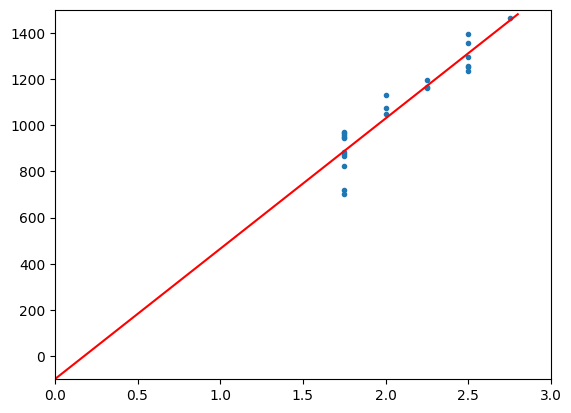

In [6]:
ind = np.arange(0,2.9,0.1)
plt.plot(X_np[:,1],y_np,'.')
plt.plot(ind, ind*weights_np[1]+weights_np[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

## Linear regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

The example of calculating linear regression using the `fit` and `predict` method can be found below.

### Data representation

Since a matrix can be represented as 2D array, in Python a matrix is represented as `list[list[type]]` for the purpose of the is e-tivity. I've opted to use float as the type.

Hence matrix will be represented as `list[list[float]]`

### Matrix validation functions

In [7]:
def is_matrix_valid(mtx: list[list[float]]) -> bool:
    """
    Parameters
    ----------
    mtx : list[list[float]]
        A Matrix of dimension m*n.
            
    Returns
    -------
    bool
        Returns True if a Matrix has all rows of the same length.
    """ 
    cls_count = len(mtx[0])
    return all( len(row) == cls_count for row in mtx )

In [8]:
def is_matrix_square(mtx: list[list[float]]) -> bool:
    """
    Parameters
    ----------
    mtx : list[list[float]]
        A Matrix of dimension m*n.
            
    Returns
    -------
    bool
        Returns True if a Matrix is square. Rows count are equal to column count.
    """ 
    mtx_shape = get_matrix_shape(mtx)
    return False if len(mtx_shape[1]) > 1 else mtx_shape[1][0] == mtx_shape[0]

In [9]:
def get_matrix_shape(mtx: list[list[float]]) -> tuple:
    """
    Parameters
    ----------
    mtx : list[list[float]]
        A Matrix of dimension m*n.
            
    Returns
    -------
    tuple
        Returns a tuple with column count and a list of row lenghts.
    """ 
    return (len(mtx), list(set([len(row) for row in mtx])))

In [10]:
def validate_matrix(mtx: list[list[float]], check_if_square: bool = False) -> None:
    """
    Validates the given Matrix, if it's in correct shape and optionaly if its a square.
    
    Parameters
    ----------
    mtx : list[list[float]]
        A Matrix of dimension m*n.
        
    check_if_square: bool, optional
        Optional to check if a given Matrix is square: m*n = n*n.
            
    Returns
    -------
    None
    
    Raises
    ------
    ValueError
        If Matrix is in invalid shape.
    """ 
    mtx_shape = get_matrix_shape(mtx)
    
    if not is_matrix_valid(mtx):
        raise ValueError(f"Matrix is in invalid shape.\nRow count: {mtx_shape[0]}\nColumn count: {mtx_shape[1]}")
        
    if check_if_square:
        if not is_matrix_square(mtx):
            raise ValueError(f"Matrix must be a square. Row count = Column Count - Eg. 2x2.\nRow count: {mtx_shape[0]}\nColumn count: {mtx_shape[1]}")

Test the above functions.

In [11]:
matrix_one = [[-1, 0, 3], [1, 1, 3]]
matrix_two = [[-1, 0], [1, 1]]

# Test 1: Test if validate_matrix raises ValueError if the given matrix is not a square.
try:
    validate_matrix(matrix_one, check_if_square = True)
except ValueError as e:
    print(f"Error: {e}")
    
# Test 2: Test if validate_matrix doesn't raise ValueError if the given matrix is a square.
try:
    validate_matrix(matrix_two, check_if_square = True)
except ValueError as e:
    print(f"Error: {e}")
    
# Test 3: Test validate_matrix return None if the matrix is valid.
matrix_valid = validate_matrix(matrix_one)
assert matrix_valid == None

# Test 4: Test if get_matrix_shape returns the correct values.
shape_of_matrix = (2, [3])
mtx_shape = get_matrix_shape(matrix_one)
assert mtx_shape == shape_of_matrix

# Test 5: Test if is_matrix_square returns True if matrix is a square.
is_matrix_a_square = is_matrix_square(matrix_two)
assert is_matrix_a_square == True

# Test 6: Test if is_matrix_square returns False if matrix is not a square.
is_matrix_a_square = is_matrix_square(matrix_one)
assert is_matrix_a_square == False

Error: Matrix must be a square. Row count = Column Count - Eg. 2x2.
Row count: 2
Column count: [3]


### Matrix opertaion functions

For the purpose of this e-tivity only the following three matrix opertaion functions are required:

* **Matrix multiplication**
* **Transposing a matrix**
* **Inversing a matrix**

**Note:** as outlined in the task section of the e-tivity only supporting the inverse of 2x2 matrix dimension is required. 

#### Matrix multiplication

$$
A = 
\left(\begin{array}{cc} 
a & b\\
c & d
\end{array}\right)
$$

$$
B = 
\left(\begin{array}{cc} 
e & f\\
g & h
\end{array}\right)
$$ 
 
Then Matrix C = AB is denoted by

$$
C = 
\left(\begin{array}{cc} 
a(e) + b(g) & a(f) + b(h)\\
c(e) + d(g) & c(f) + d(h)
\end{array}\right)
$$  
 
An element in matrix C where C is the multiplication of Matrix A X B.

In [12]:
def matrix_multiplication(mtx_a: list[list[float]], mtx_b: list[list[float]]) -> list[list[float]]:
    """
    Multiplies Matrix a and matrix b.
    
    Parameters
    ----------
    mtx_a : list[list[float]]
        A Matrix of dimension m*n
        
    mtx_b : list[list[float]]
        A Matrix of dimension m*n
        
    Returns
    -------
    list[list[float]]
        Returns the resultant Matrix of Matrix multiplication.
        
    Raises
    ------
    ValueError
        If the the number of columns in Matrix A is not equal to the number of rows in Matrix B.
    """
    
    validate_matrix(mtx_a)
    
    validate_matrix(mtx_b)
    
    if len(mtx_a[0]) != len(mtx_b):
        raise ValueError("""
        The number of columns in Matrix A must be the same
        as the number of rows in Matrix B for Matrix multiplication to be possible.
        """)
        
    return [[sum(a * b for a, b in zip(row_mtx_a, col_mtx_b)) 
                for col_mtx_b in zip(*mtx_b)] for row_mtx_a in mtx_a]

#### Matrix transponse

The transpose of a matrix is found by swapping the row and column indices of each element, effectively flipping the matrix over its diagonal.

If the rows and columns of a matrix A are interchanged (so that the first row becomes the first column, the second row becomes the second column, and so on) we obtain what is called the transpose of A.

$$
A = 
\left(\begin{array}{cc} 
a & b\\
c & d
\end{array}\right)
$$ 

**The transpose of A is denoted by:**

$$
A^T =
\left(\begin{array}{cc} 
a & c\\ 
b & d
\end{array}\right)
$$

In [13]:
def transpose_matrix(mtx: list[list[float]]) -> list[list[float]]:
    """
    Transposes a Matrix by switching its rows with its columns.
    
    Parameters
    ----------
    mtx_a : list[list[float]]
        A Matrix of dimension m*n
        
    Returns
    -------
    list[list[float]]
        Returns the transposed matrix.
        
    Raises
    ------
    ValueError
        If Matrix is not in valid shape. Rows length differ.
    """
    validate_matrix(mtx)
        
    return [ [*x] for x in tuple(zip(*mtx))]

#### Matrix Inverse

The inverse of a square matrix A, sometimes called a reciprocal matrix, is a matrix $ A^{-1} $ such that $ A*A^{-1} = I $ where $ I $ is the identity matrix.

The determinant of A is a scalar value and is given by:

$$ |A| = ad - bc $$

A square matrix A has an inverse if the determinant $ |A|\neq0 $. Otherwise the matrix is not reversible.

The so-called invertible matrix theorem is major result in linear algebra which associates the existence of a matrix inverse with a number of other equivalent properties. A matrix possessing an inverse is called nonsingular, or invertible.

**For a 2x2 matrix**

$$
A = 
\left(\begin{array}{cc} 
a & b\\
c & d
\end{array}\right)
$$ 

the matrix inverse is

$$
A^{-1} = \frac{1}{|A|} 
\left(\begin{array}{cc} 
d & -b\\
-c & a
\end{array}\right)
$$ 

In [14]:
def inverse_matrix_gaussian_elimination(mtx: list[list[float]]) -> list[list[float]]:
    """
    Inverses a Matrix by using Gaussian elimination method for matrices bigger than 2x2.
    
    Parameters
    ----------
    mtx_a : list[list[float]]
        A matrix of dimension m*n.
        
    Returns
    -------
    list[list[float]]
        Returns the inversed Matrix.
        
    Raises
    ------
    ValueError
        If matrix is not in valid shape or if its determinant is equal to 0.
    """
    validate_matrix(mtx, check_if_square=True)
        
    order_of_mtx = len(mtx)
 
    identity = [[1.0 if i == j else 0.0 for j in range(order_of_mtx)] for i in range(order_of_mtx)]

    augmented_matrix = [row + identity[i] for i, row in enumerate(mtx)]
    
    for i in range(order_of_mtx - 1, 0, -1):
        if augmented_matrix[i - 1][0] < augmented_matrix[i][0]:
            tempArr = augmented_matrix[i]
            augmented_matrix[i] = augmented_matrix[i - 1]
            augmented_matrix[i - 1] = tempArr
 
    for i in range(order_of_mtx):
        for j in range(order_of_mtx):
            if j != i:
                if augmented_matrix[i][i] == 0:
                    raise ValueError("Matrix is non reversible.")
                temp = augmented_matrix[j][i] / augmented_matrix[i][i]
                for k in range(2 * order_of_mtx):
                    augmented_matrix[j][k] -= augmented_matrix[i][k] * temp
 
    for i in range(order_of_mtx):
        pivot = augmented_matrix[i][i]
        if pivot == 0:
            raise ValueError("Matrix is non reversible.")
        for j in range(2 * order_of_mtx):
            augmented_matrix[i][j] = augmented_matrix[i][j] / pivot
 
    return [row[-order_of_mtx:] for row in augmented_matrix]

In [15]:
def inverse_matrix(mtx: list[list[float]]) -> list[list[float]]:
    """
    Inverses a Matrix by dividing each element of the matrix by the determinant of the Matrix. Switiching a and d, negating c and b.
    If the the determinant is 0 then a inverse doesn't exist.
    
    Parameters
    ----------
    mtx_a : list[list[float]]
        A matrix of dimension m*n.
        
    Returns
    -------
    list[list[float]]
        Returns the inversed Matrix.
        
    Raises
    ------
    ValueError
        If matrix is not in valid shape or if its determinant is equal to 0.
    """
    matrix_shape = get_matrix_shape(mtx)
        
    validate_matrix(mtx, check_if_square=True)

    if not len(mtx) > 2 and len(mtx[0]) > 2:
        return inverse_matrix_gaussian_elimination(mtx)
        
    a, b, c, d = mtx[0][0], mtx[0][1], mtx[1][0], mtx[1][1]
    # Calculate the determinant of the matrix det = ad - bc.
    dt = (a * d) - (b * c)
            
    if not dt:
        raise ValueError("Matrix is not reversible. Its determinant is zero. ad - bc = 0")
            
    # Divide each element of the original matrix by the determinant to obtain the elements of the inverse matrix.
    return [[d / dt, -b / dt], [-c / dt, a / dt]]

In [16]:
reverse_mtx = inverse_matrix_gaussian_elimination([[1, 2, 3], [4, 2, 6], [7,8,9]])

print(f"Reversed Matrix:\n{reverse_mtx}")

Reversed Matrix:
[[-0.8333333333333331, 0.16666666666666669, 0.16666666666666666], [0.1666666666666667, -0.33333333333333337, 0.16666666666666666], [0.49999999999999994, 0.16666666666666666, -0.16666666666666666]]


**Result from WolframAlpha - Reversing Matrix**

Ref: https://www.wolframalpha.com/input?i=inverse+%5B%5B1%2C+2%2C+3%5D%2C+%5B4%2C+2%2C+6%5D%2C+%5B7%2C8%2C9%5D%5D

$$
A =
\left(\begin{array}{cc} 
1 & 2 & 3\\
4 & 2 & 6\\
7 & 8 & 9
\end{array}\right)
$$ 

$$
A^{-1} = \frac{1}{6}
\left(\begin{array}{cc} 
-5 & 1 & 1\\
1 & -2 & 1\\
3 & 1 & -1
\end{array}\right)
$$ 

$$
A^{-1} =
\left(\begin{array}{cc} 
-0.8333333333333331 & 0.16666666666666669 & 0.16666666666666666\\
0.1666666666666667 & -0.33333333333333337 & 0.16666666666666666\\
0.49999999999999994 & 0.16666666666666666 & -0.16666666666666666
\end{array}\right)
$$ 


The below methods are not used within the code but it has been suggested by Adam Ralph https://learn.ul.ie/d2l/le/10675/discussions/threads/12763/View that Matrix addition and subtracion should be added into the implementation.

The below uses a wrapper function which takes a lambda function as a parameter to save on repetitive code.

In [17]:
def mtx_wrapper(mtx_op: callable, mtx_a: list[list[float]], mtx_b: list[list[float]]) -> list[list[float]]:
    """
    A wrapper function for operating on Matrices. It takes a lambda function as a parameter which defines the operation on the Matrix.
    Also preventing from writting repetitive code for the same a method which has almost identical implementation.
    
    Parameters
    ----------
    mtx_a : list[list[float]]
        A matrix of dimension m*n.
        
    mtx_b : list[list[float]]
        A matrix of dimension m*n.
       
    mtx_op : callable
        A lambda function which is small anonymous function.
        
    Returns
    -------
    list[list[float]]
        Returns the resultant Matrix.
        
    Raises
    ------
    ValueError
        If matrix is not in valid shape.
    """
    
    validate_matrix(mtx_a)
    
    validate_matrix(mtx_b)
    
    mtx_a_shape = get_matrix_shape(mtx_a)

    mtx_b_shape = get_matrix_shape(mtx_b)
    
    if mtx_a_shape != mtx_b_shape:
        raise ValueError(f"Matrices must of same size for the given operation\nMatrix A Shape: {mtx_a_shape}\nMatrix B Shape: {mtx_b_shape}")

    return [[mtx_op(mtx_a[i][j], mtx_b[i][j]) 
             for j in range(len(mtx_a[0]))] 
             for i in range(len(mtx_a))]

def matrix_addition(mtx_a: list[list[float]], mtx_b: list[list[float]]) -> list[list[float]]:
    """    
    Parameters
    ----------
    mtx_a : list[list[float]]
        A matrix of dimension m*n.
        
    mtx_b : list[list[float]]
        A matrix of dimension m*n.
        
    Returns
    -------
    list[list[float]]
        Returns the resultant Matrix.
        
    Raises
    ------
    ValueError
        If Matrices are not in valid shape or of different shapes.
    """
    return mtx_wrapper(lambda a,b: a + b, mtx_a, mtx_b)

def matrix_subtraction(mtx_a: list[list[float]], mtx_b: list[list[float]]) -> list[list[float]]:
    """    
    Parameters
    ----------
    mtx_a : list[list[float]]
        A matrix of dimension m*n.
        
    mtx_b : list[list[float]]
        A matrix of dimension m*n.
        
    Returns
    -------
    list[list[float]]
        Returns the resultant Matrix.
        
    Raises
    ------
    ValueError
        If Matrices are not in valid shape or of different shapes.
    """
    return mtx_wrapper(lambda a,b: a - b, mtx_a, mtx_b)
    

In [18]:
matrix_one = [[-1, 0], [1, 1]]
matrix_two = [[1.0, 2.0], [3.0, 4.0]]
matrix_three = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0,8.0,9.0], [10.0,11.0,12.0]]
matrix_four = [[1, 2, 3], [4, 5, 6]]


# Test 1: Test if matrix_addition add matrices correctly.
mtx_add = matrix_addition(matrix_one, matrix_two)
assert mtx_add == [[0.0, 2.0], [4.0, 5.0]]

# Test 2: Test if matrix_addition raises ValueError if Matrix has not all equal row lenghts.
try:
    mtx = matrix_addition([[1], [1, 2]], matrix_three)
except ValueError as e:
    print(f"Error: {e}")
    
# Test 3: Test if matrix_subtraction subtracts tmatrices correctly.
mtx_sub = matrix_subtraction(matrix_one, matrix_two)
assert mtx_sub == [[-2.0, -2.0], [-2.0, -3.0]]

# Test 4: Test if matrix_subtraction raises ValueError if Matrices are of different size.
try:
    mtx = matrix_addition(matrix_one, matrix_three)
except ValueError as e:
    print(f"Error: {e}")

Error: Matrix is in invalid shape.
Row count: 2
Column count: [1, 2]
Error: Matrices must of same size for the given operation
Matrix A Shape: (2, [2])
Matrix B Shape: (4, [3])


#### Test the above functions:

* `inverse_matrix`
* `transpose_matrix`
* `matrix_multiplication`

In [19]:
matrix_one = [[-1, 0], [1, 1]]
matrix_two = [[1.0, 2.0], [3.0, 4.0]]
matrix_three = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0,8.0,9.0], [10.0,11.0,12.0]]
matrix_four = [[1, 2, 3], [4, 5, 6]]

# Test 1: Test if matrix_multiplication multiplies matrices correctly.
mtx = matrix_multiplication(matrix_one, matrix_two)
assert mtx == [[-1.0, -2.0], [4.0, 6.0]]

# Test 2: Test if matrix_multiplication raises ValueError if the row count of matrix A not equal column count of matrix B.
try:
    mtx = matrix_multiplication(matrix_one,matrix_three)
except ValueError as e:
    print(f"Error: {e}")
    
# Test 3: Test if transpose_matrix computes the transpose of a matrix correctly.
inverse_of_x = inverse_matrix(matrix_one)
assert inverse_of_x == [[-1.0, -0.0], [1.0, 1.0]]

# Test 4: Test if multiplying the transpose of the matrix by its self results in the identity matrix.
identity_matirx = matrix_multiplication(matrix_one, inverse_of_x)
assert identity_matirx == [[1.0, 0.0], [0.0, 1.0]]

# Test 5: Test if transpose_matrix returns the correct transposed matrix.
transposed_matrix = transpose_matrix(matrix_four)
assert transposed_matrix == [[1,4], [2,5], [3,6]]

Error: 
        The number of columns in Matrix A must be the same
        as the number of rows in Matrix B for Matrix multiplication to be possible.
        


#### Dot product

The dot product, also called scalar product, is a measure of how closely two vectors align, in terms of the directions they point. The measure is a scalar number that can be used to compare the two vectors and to understand the impact of repositioning one or both of them. The dot product  of two vectors is the sum of the products of corresponding components.

$$
v1 = 
\left(\begin{array}{cc} 
4 & 6 & 6\\
\end{array}\right) 
$$ 
$$
v2 = 
\left(\begin{array}{cc} 
6 & 5 & 6\\
\end{array}\right) 
$$ 
$$
v1 * v2 = \left(\begin{array}{cc} 
4*6 & 6 * 5 & 6 * 6\\
\end{array}\right) 
= 96
$$ 

In [20]:
 def dot_product(vct_a: list[float], vct_b: list[float]) -> float:
    """
    Calculates the dot product (scalar product) of the two given vectors.
    
    Parameters
    ----------
    vct_a : list[float]
        A vector of length m.
        
    vct_b : list[float]
        A vector of length m.
        
    Returns
    -------
    float
        Returns the dot product (scalar product) of the two given vectors.
        
    Raises
    ------
    ValueError
        If the vectors are not of the same length.
    """
    if len(vct_a) != len(vct_b):
        raise ValueError("Vector A and vector B must be of the same length.")
        
    return sum([i*j for (i, j) in zip(vct_a, vct_b)])

In [21]:
v1 = [4, 6, 7]
v2 = [6, 5, 6]

# Test 1: Test that dot_product multiplies two given vectors correctly.
r1 = dot_product(v1, v2)
assert r1 == 96

# Test 2: Test that dot_product raises ValueError if two given vectors are of different sizes.
v1 = [1, 2]
v2 = [4, 5, 6]
try:
    dot_product(v1, v2)
except ValueError as e:
    print(f"ERROR: {e}")

ERROR: Vector A and vector B must be of the same length.


In [22]:
def is_val_a_matrix(val) -> bool:
    """
    Checks if val is a valid matirx
    
    Parameters
    ----------
    val
        Value passed to be checked if its a matrix - a list of lists.
        
    Returns
    -------
    bool
        Returns True if value passed if a list of lists.
    """
    if not val or not isinstance(val, list):
        return False
    
    return all(isinstance(sublist, list) and len(sublist) == len(val[0]) for sublist in val)

In [23]:
def list_to_matrix(lst: list[float]) -> list[list[float]]:
    """
    Converts a list to a list of list - matrix.
    
    Parameters
    ----------
    lst : list[float]
        List of values to be converted to a matrix.
        
    Returns
    -------
    list[list[float]]
        Returns a list to be converted to a matrix.
    """
    return [[x] for x in lst]

In [24]:
def pritty_print(lst) -> str:
    """
    Prettify a list.
    
    Parameters
    ----------
    lst
        A list of values.
        
    Returns
    -------
    str
        A prettified list with index number pre-appended.
    """
    
    if isinstance(lst[0], list):
        "\n".join([f"{index}. {''.join(row)}" for index, row in enumerate(lst)])
        
    if isinstance(lst[0], np.ndarray):
        flattened_lst = [item for sublist in lst for item in sublist]
        return "\n".join([f"{index}. {row}" for index, row in enumerate(flattened_lst)])
        
    return "\n".join([f"{index}. {row}" for index, row in enumerate(lst)])

In [25]:
def truncate_float(mtx, decimal_place:int = 10) -> list[list[float]]:
    """
    Truncates the float values of Matrix to a given precission.

    Parameters
    ----------
    mtx
        A Matrix of dimension m*n

    Returns
    -------
    list
        Returns the resultant Matrix of Matrix after float truncation.
    """
    
    if isinstance(mtx[0], list):
        return [[float(str(element)[:decimal_place]) for element in row] for row in mtx]
    
    return [float(str(element)[:decimal_place]) for element in mtx]

### Finding the weights example:

Given X and y, calculate the weights, w using the pseudo-inverse approach described above. 

$$
X = 
\left(\begin{array}{cc} 
1 & 1\\
1 & 2\\
1 & 3
\end{array}\right)
$$

$$
y = \left(\begin{array}{cc} 
3\\
7\\
11
\end{array}\right)
$$ 


**First step is to find the Transpose of X:**

$$
X^T = 
\left(\begin{array}{cc} 
1 & 1 & 1\\
1 & 2 & 3
\end{array}\right)
$$ 

**Once the transpose of X has been found. We multiply X by its transpose, $ X^T $:**

$$
X^TX = 
\left(\begin{array}{cc} 
1 & 1 & 1\\
1 & 2 & 3
\end{array}\right)
\left(\begin{array}{cc} 
1 & 1\\
1 & 2\\
1 & 3
\end{array}\right)
= \left(\begin{array}{cc} 
3 & 6\\
6 & 14
\end{array}\right)
$$ 

**Then calculate the inverse, $ X^TX^{−1}:$**

$$
X^TX^{−1} = \frac{1}{3.14 - 6.6}\left(\begin{array}{cc} 
14 & - 6\\
- 6 & 3
\end{array}\right)
$$ 

**Once the inverse has been found of $ X^TX^{−1} $ find the dot product of, $ X^Ty$:**

$$
X^TXy = \left(\begin{array}{cc} 
1 & 1 & 1\\
1 & 2 & 3
\end{array}\right)
\left(\begin{array}{cc} 
3\\
7\\
11
\end{array}\right)
= \left(\begin{array}{cc} 
21\\
50
\end{array}\right)
$$ 

**Lastly we find the weight, $w$ by finding the dot product of $ (X^TX^{−1})X^Ty$:**

$$
w = (X^TX^{−1})X^Ty = \left(\begin{array}{cc} 
14 & - 6\\
- 6 & 3
\end{array}\right)\left(\begin{array}{cc} 
21\\
50
\end{array}\right)
=\left(\begin{array}{cc} 
-1\\
4
\end{array}\right)
$$ 

**These found weights $w_0 = -1$ and $ w_1 = 4$** can be used for predictions of new data points on a straight line using the below equation of the straight line: $$ y = wx = w_0 + w_1x_1$$

In [26]:
 def get_params(x: list[list[float]], y: list[float], trct_float: bool = False) -> list[float]:
    """
    Weights calculated by the fit method.
    
    Parameters
    x : list[list[float]]
        A two 2d array of data points.
        
    y : list[float]
        A list of weights found by the fit method.
        
    trct_float: bool, optional
        Boolean value to indicate if to turncate the float value in the list.
        
    Returns
    -------
    list[float]
        Returns a list of weights calculated by the fit method.
    """
    result = fit(x, y)
    
    if trct_float:
        return truncate_float(result)
    
    return result

In [27]:
 def predict(x: list[list[float]], weights: list[float], trct_float: bool = False) -> list[float]:
    """"
    Returns a list of predictions based on the data points in X.
    
    Parameters
    ----------
    x : list[list[float]]
        A two 2d array of data points.
        
    weights : list[float]
        A list of weights found by the fit method.
        
    trct_float: bool, optional
        Boolean value to indicate if to turncate the float value in the list.
        
    Returns
    -------
    list[float]
        Returns a list of the dot products (predictions) of rows in X multiplied by the weigh vector.
        
    Raises
    ------
    ValueError
        If the vectors are not of the same length.
    """
    result = [dot_product(row, weights) for row in x]
    
    if trct_float:
        return truncate_float(result)
    return result

In [28]:
def fit(x: list[list[float]], y: list[float]) -> list[float]:
    """"
    Calculates least squares estimate of the linear regression weight vector using x and y.
    
    Parameters
    ----------
    x : list[list[float]]
        A two 2d array of data points.
        
    y : list[float]
        A list of weights found by the fit method.
        
    Returns
    -------
    list[float]
        Returns a list of weights.
        
    Raises
    ------
    ValueError
        If the number of rows in x is not equal to the number of elements in y.
    """
    if len(x) != len(y):
        raise ValueError(f"Number of rows in x must be the same as the number of elements in y. No of rows in x: {len(x)}\nSize of y: {len(y)}\n")
        
    # Calculate the transpose of x
    transpose_of_x = transpose_matrix(x)
        
    # Calulcate the transpose of x by x
    xtx = matrix_multiplication(transpose_of_x, x)

    # Inverse the result of x^T * x
    xtx_inversed = inverse_matrix(xtx)

    # Compute the matrix using the transpose of x and list of y converted to matrix
    # Checks if y is a matrix an converts if not
    xty = matrix_multiplication(transpose_of_x, list_to_matrix(y) if not is_val_a_matrix(y) else y)

    # Calculate the least squares estimate of the linear regression weight vector
    weights = matrix_multiplication(xtx_inversed, xty)
    
    return [row[0] for row in weights]

In [29]:
x = [[1, 1], [1, 2], [1, 3]]  
y = [3, 7, 11] 

# Caluclate and return the weights found by the fit method
weights = get_params(x,y)

# Predict with the obtained weights
predictions = predict(x, weights)

print(f"Weights:\n{pritty_print(weights)}")
print(f"Predictions:\n{pritty_print(predictions)}")

Weights:
0. -1.0
1. 4.0
Predictions:
0. 3.0
1. 7.0
2. 11.0


The result of weight $ w_0 = -1 $ and $ w_1 = 4 $ confirm to the manual sample done above in the `Finding the weights example`

Dot product using the found weights

$$
x = [[1, 1], [1, 2], [1, 3]]  
$$
$$
w = [-1, 4]
$$

predictions = dot_product of row in x by w

$$
predicitons = [[(1*-1) + (4*1)], [(1*-1) + (2*4)], [(1*-1)+(3*4)]]
$$

$$
predicitons = [[3], [7], [11]]
$$

$$
predicitons = [3, 7, 11]
$$

predicitons = [3, 7, 11] confirms to the output of `predictions = predict(x, weights)` in the above cell.

<hr style="border:2px solid gray"> </hr>

### Read CSV file

This function reads the csv file using csv lib. However instead of using the csv lib, I could have also read the csv line by line and have it split on comma.

In [30]:
def open_file(file_name:str) -> (list[list[float], list[float]]):
    """"
    Opens and reds csv file of data points.
    
    Parameters
    ----------
    file_name: str
        Name of the CSV file to be read.
        
    Returns
    -------
    tuple(list[list[float], list[float]])
        Returns a tuple of x data points and y values.
    """
    x = []
    y = []

    try:
        with open(file_name, 'r', newline='') as file:
            reader = csv.reader(file)
            for row in reader:
                values = [float(value) for value in row]
                x.append(values[:-1])
                y.append(values[-1])
    except FileNotFoundError:
        print(f"{file_name} not found.")
    except Exception as e:
        print(f"Error reading {file_name}: {e}")

    return (x, y)

In [31]:
# Open lr_data.csv and read the data points x and output values (bias) y
x_fn, y_fn = open_file("lr_data.csv")

# Caluclate and return the weights found by the fit method
weights_fn = get_params(x_fn, y_fn)

# Predict with the obtained weights
predictions_fn = predict(x_fn, weights_fn)

print(f"Weights:\n{pritty_print(weights_fn)}")
print(f"Predictions:\n{pritty_print(predictions_fn)}")

Weights:
0. -99.46431881371245
1. 564.2038924930494
Predictions:
0. 1452.0963855421733
1. 1311.045412418911
2. 1311.045412418911
3. 1311.045412418911
4. 1311.045412418911
5. 1311.045412418911
6. 1311.045412418911
7. 1169.9944392956486
8. 1169.9944392956486
9. 1169.9944392956486
10. 1028.9434661723863
11. 1028.9434661723863
12. 1028.9434661723863
13. 887.8924930491239
14. 887.8924930491239
15. 887.8924930491239
16. 887.8924930491239
17. 887.8924930491239
18. 887.8924930491239
19. 887.8924930491239
20. 887.8924930491239
21. 887.8924930491239
22. 887.8924930491239
23. 887.8924930491239


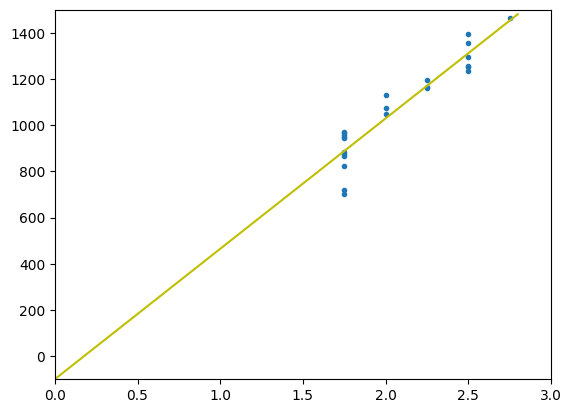

In [32]:
indices_fn = [i/10.0 for i in range(29)]

x_values = [x[1] for x in x_fn]
plt.plot(x_values, y_fn, '.')
plt.plot(indices_fn, [i * weights_fn[1] + weights_fn[0] for i in indices_fn], 'y')
plt.axis([0, 3, -100, 1500])
plt.show()

In [33]:
class Matrix:
    def __init__(self, data: list[list[float]]):
        self.data = data
        
    @property
    def data(self) -> "Matrix":
        return self._data

    @data.setter
    def data(self, data) -> None:
        if not self.is_valid_matrix(data): 
            raise ValueError(f"Matrix is in invalid shape.\n")
        self._data = data
    
    @property
    def shape(self) -> tuple:
        """
        Parameters
        ----------
        self : Matrix
            A Matrix of dimension m*n.

        Returns
        -------
        tuple
            Returns the size of the Matrix.
        """ 
        return (len(self.data), len(self.data[0]))
    
    # https://numpy.org/doc/stable/reference/generated/numpy.matrix.T.html
    # I've copied numpies implementation of the transponse which treats the transponse of the matrix as its property.
    @property
    def T(self) -> "Matrix":
        """
        Parameters
        ----------
        self : Matrix
            A Matrix of dimension m*n

        Returns
        -------
        Matrix
            Returns the transposed Matrix.
        """
        return Matrix([[*x] for x in tuple(zip(*self.data))])
    
            
    def is_valid(self) -> bool:
        """
        Parameters
        ----------
        self : list[list[float]]
            A Matrix of dimension m*n.

        Returns
        -------
        bool
            Returns True if a Matrix has all rows of the same length.
        """
        return is_matrix_valid(self.data)    
        
    def is_valid_matrix(self, data) -> bool:
        """
        Parameters
        ----------
        self : list[list[float]]
            A Matrix of dimension m*n.

        Returns
        -------
        bool
            Returns True if a Matrix has all rows of the same length.
        """
        return all(len(row) == len(data[0]) for row in data)

    def is_sqaure(self) -> bool:
        """
        Parameters
        ----------
        self : Matrix
            A Matrix of dimension m*n.

        Returns
        -------
        bool
            Returns True if a Matrix is square. Rows count are equal to column count.
        """ 
        return self.shape[0] == self.shape[1]
    
    def inverse(self) -> "Matrix":
        """
        Inverses a Matrix by dividing each element of the Matrix by the determinant of the Matrix. Switiching a and d, negating c and b.
        If the the determinant is 0 then a inverse of the Matrix doesn't exist.

        Parameters
        ----------
        self : Matrix
            A Matrix of dimension m*n.

        Returns
        -------
        Matrix
            Returns the inversed Matrix.

        Raises
        ------
        ValueError
            If Matrix is not in valid shape or if its determinant is equal to 0.
        """
        
        if not self.is_valid() or not self.is_sqaure():
            raise ValueError("The matrix is not in a valid format to be inversed. Must be in a dim of 2x2.\nMatrix Shape: {self.shape}\n")

        if len(self.data) > 2 and len(self.data[0]) > 2:
            return self.gauss_inverse()
            
        a, b, c, d = self.data[0][0], self.data[0][1], self.data[1][0], self.data[1][1]
        # Calculate the determinant of the matrix det = ad - bc.
        dt = (a * d) - (b * c)
        
        if not dt:
            raise ValueError("Matrix is not reversible. Its determinant is zero. ad - bc = 0. A Matrix is only reversible if it's determinant != 0")

        # Divide each element of the original matrix by the determinant to obtain the elements of the inverse matrix.
        return Matrix([[d / dt, -b / dt], [-c / dt, a / dt]])
    
    def gauss_inverse(self) -> "Matrix":
        """
        Inverses a Matrix by using Gaussian elimination method for matrices bigger than 2x2.

        Parameters
        ----------
        self : Matrix
            A matrix of dimension m*n.

        Returns
        -------
        Matrix
            Returns the inversed Matrix.

        Raises
        ------
        ValueError
            If matrix is not in valid shape or if its determinant is equal to 0.
        """
        if not self.is_valid() or not self.is_sqaure():
            raise ValueError("The matrix is not in a valid format to be inversed. Must be in a dim of n*n.\nMatrix Shape: {self.shape}\n")

        order_of_mtx = len(self.data)

        identity = [[1.0 if i == j else 0.0 for j in range(order_of_mtx)] for i in range(order_of_mtx)]

        augmented_matrix = [row + identity[i] for i, row in enumerate(self.data)]

        for i in range(order_of_mtx - 1, 0, -1):
            if augmented_matrix[i - 1][0] < augmented_matrix[i][0]:
                tempArr = augmented_matrix[i]
                augmented_matrix[i] = augmented_matrix[i - 1]
                augmented_matrix[i - 1] = tempArr

        for i in range(order_of_mtx):
            for j in range(order_of_mtx):
                if j != i:
                    if augmented_matrix[i][i] == 0:
                        raise ValueError("Matrix is non reversible.")
                    temp = augmented_matrix[j][i] / augmented_matrix[i][i]
                    for k in range(2 * order_of_mtx):
                        augmented_matrix[j][k] -= augmented_matrix[i][k] * temp

        for i in range(order_of_mtx):
            pivot = augmented_matrix[i][i]
            if pivot == 0:
                raise ValueError("Matrix is non reversible.")
            for j in range(2 * order_of_mtx):
                augmented_matrix[i][j] = augmented_matrix[i][j] / pivot

        return Matrix([row[-order_of_mtx:] for row in augmented_matrix])

    def dot(self, other) -> "Matrix":
        """
        Multiplies Matrix A and Matrix B.

        Parameters
        ----------
        self : Matrix
            A Matrix of dimension m*n

        other : Matrix
            A Matrix of dimension m*n

        Returns
        -------
        Matrix
            Returns the resultant Matrix of Matrix multiplication.

        Raises
        ------
        ValueError
            If the matrices are in invalid shape to be applicable for the dot product.
        """
        dim_a = self.shape
        dim_b = other.shape
        
        if not self.is_valid() or not other.is_valid():
            raise ValueError("The matrices are not in a valid format to be multiplied.\nMatrix A shape: {dim_a}\nMatrix B shape: {dim_b}\n")
        
        return Matrix([[sum(a * b for a, b in zip(row_mtx_a, col_mtx_b)) 
                        for col_mtx_b in zip(*other.data)] for row_mtx_a in self.data])
    
    def truncate_float(self, decimal_place: int = 10):
        """
        Truncates the float values of Matrix to a given precission.

        Parameters
        ----------
        self : Matrix
            A Matrix of dimension m*n

        Returns
        -------
        Matrix
            Returns the resultant Matrix of Matrix after float truncation.
        """
        
        return Matrix([[float(str(element)[:decimal_place]) for element in row] for row in self.data])
    
    def tolist(self) -> list[float]:
        """
        Flattens the double list to a single list of elements.

        Parameters
        ----------
        self : Matrix
            A Matrix of dimension m*n

        Returns
        -------
        list[float]
            Returns a list of the Matrix elements.
        """
        return [item for sublist in self.data for item in sublist]
    
    def __str__(self):
        if len(self.data[0]) == 1:
            return "\n".join([f"{index}. {row[0]}" for index, row in enumerate(self.data)])
        return "\n".join([" ".join(map(str, row)) for row in self.data])

In [34]:
class LinearRegression:
    def __init__(self, x ,y):
        self.x = Matrix(x)
        self.y = Matrix([[x] for x in y])
        self.w = None

    def fit(self, truncate_float: bool = False):
        """"
        Calculates least squares estimate of the linear regression weight vector using x and y.

        Parameters
        ----------
        self : Matrix
            A Matrix on input data points.

        truncate_float: bool, optional
            Value used to if truncatin the float elements of the Matrix.

        Returns
        -------
        None
        """
        # Calculate the transpose of x -> x^T
        transpose_of_x = self.x.T
        # Calulcate the transpose of x by x and inverse it
        xtx_inv_inversed = transpose_of_x.dot(self.x).inverse()
        # Compute the matrix using the transpose of x and list of y converted to matrix and 
        # calculate the least squares estimate of the linear regression weight vector
        if truncate_float:
            self.w = xtx_inv_inversed.dot(transpose_of_x).dot(self.y).truncate_float()
        else:   
            self.w = xtx_inv_inversed.dot(transpose_of_x).dot(self.y)
    
    def predict(self, truncate_float: bool = False):
        """"
        Returns a list of predictions based on the input data points in Matrix.

        Parameters
        ----------
        self : Matrix
            A Matrix on input data points.
            
        truncate_float: bool, optional
            Value used to if truncatin the float elements of the Matrix.

        Returns
        -------
        Matrix
            Returns a resultant Matirx of the dot products (predictions) of rows in Matrix multiplied by the weight vector.
        """
        if truncate_float:
            return self.x.dot(self.w).truncate_float()
            
        return self.x.dot(self.w)

Weights:
0. -99.4643188137135
1. 564.2038924930501

Predictions:
0. 1452.0963855421744
1. 1311.0454124189118
2. 1311.0454124189118
3. 1311.0454124189118
4. 1311.0454124189118
5. 1311.0454124189118
6. 1311.0454124189118
7. 1169.9944392956493
8. 1169.9944392956493
9. 1169.9944392956493
10. 1028.9434661723867
11. 1028.9434661723867
12. 1028.9434661723867
13. 887.8924930491243
14. 887.8924930491243
15. 887.8924930491243
16. 887.8924930491243
17. 887.8924930491243
18. 887.8924930491243
19. 887.8924930491243
20. 887.8924930491243
21. 887.8924930491243
22. 887.8924930491243
23. 887.8924930491243



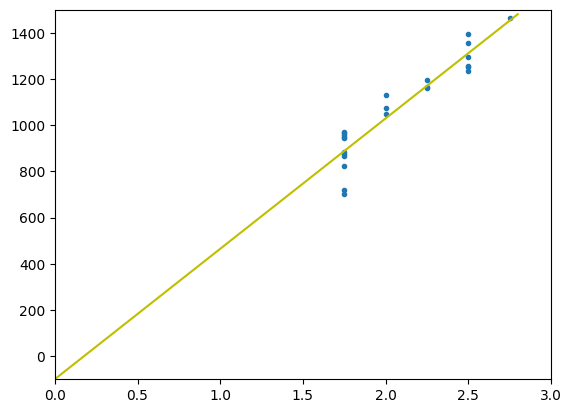

In [35]:
# Open lr_data.csv and read the data points x and y
x_cls, y_cls = open_file("lr_data.csv")

# Caluclate and return the weights found by the fit method
regres = LinearRegression(x_cls,y_cls)
regres.fit()

# Predict with the obtained weights
predictions = regres.predict()

print(f"Weights:\n{regres.w}\n")
print(f"Predictions:\n{predictions}\n")

weights_cls = [row[0] for row in regres.w.data]

indices_cls = [i/10.0 for i in range(29)]

x_values_cls = [x[1] for x in x_cls]

plt.plot(x_values_cls, y_cls, '.')
plt.plot(indices_cls, [i * weights_cls[1] + weights_cls[0] for i in indices_cls], 'y')
plt.axis([0, 3, -100, 1500])
plt.show()

### Test: Verify that all three approches yield the same result.

In [36]:
x_test, y_test = open_file("lr_data.csv")

# Caluclate and return the weights found by the fit method
weights_test_fn = get_params(x_test,y_test,trct_float = True)

# Predict with the obtained weights
predictions_test_fn = predict(x_test, weights_test_fn,trct_float = True)

print("Functional implementation\n")
print(f"Weights:\n{pritty_print(weights_test_fn)}\n")
print(f"Predictions:\n{pritty_print(predictions_test_fn)}\n")

# Caluclate and return the weights found by the fit method using class based approach
regres_test = LinearRegression(x_test,y_test)
regres_test.fit(truncate_float = True)

# Predict with the obtained weights
predictions_test_cls_two = regres.predict(truncate_float = True)

print("Class implementation\n")
print(f"Weights:\n{regres_test.w}\n")
print(f"Predictions:\n{predictions_test_cls_two}\n")

weights_np = linreg_weights(X_np,y_np)
predictions_np = linreg_predict(weights_np, X_np)

# Flatten the double array by np as fn implementation returns both weights and predictions in list
flattened_weights_np = truncate_float([item for sublist in weights_np for item in sublist])
flattened_predictions_np = truncate_float([item for sublist in predictions_np for item in sublist])

print("NumPy implementation\n")
print(f"Weights:\n{pritty_print(flattened_weights_np)}\n")
print(f"Predictions:\n{pritty_print(flattened_predictions_np)}\n")

# Test that weights of np == weights found by the class implementation
assert flattened_weights_np == regres_test.w.tolist()
# Test that predictions of np == predictions found by the class implementation
assert flattened_predictions_np == predictions_test_cls_two.tolist()
# Test that weights of np == weights found by the fn implementation
assert flattened_weights_np == weights_test_fn
# Test that predictions of np == predictions found by the fn implementation
assert flattened_predictions_np == predictions_test_fn
# Test that predictions of fn == predictions found by the class implementation
assert predictions_test_fn == predictions_test_cls_two.tolist()
# Test that weights of fn == weights found by the class implementation
assert weights_test_fn == regres_test.w.tolist()

Functional implementation

Weights:
0. -99.464318
1. 564.203892

Predictions:
0. 1452.09638
1. 1311.04541
2. 1311.04541
3. 1311.04541
4. 1311.04541
5. 1311.04541
6. 1311.04541
7. 1169.99443
8. 1169.99443
9. 1169.99443
10. 1028.94346
11. 1028.94346
12. 1028.94346
13. 887.892493
14. 887.892493
15. 887.892493
16. 887.892493
17. 887.892493
18. 887.892493
19. 887.892493
20. 887.892493
21. 887.892493
22. 887.892493
23. 887.892493

Class implementation

Weights:
0. -99.464318
1. 564.203892

Predictions:
0. 1452.09638
1. 1311.04541
2. 1311.04541
3. 1311.04541
4. 1311.04541
5. 1311.04541
6. 1311.04541
7. 1169.99443
8. 1169.99443
9. 1169.99443
10. 1028.94346
11. 1028.94346
12. 1028.94346
13. 887.892493
14. 887.892493
15. 887.892493
16. 887.892493
17. 887.892493
18. 887.892493
19. 887.892493
20. 887.892493
21. 887.892493
22. 887.892493
23. 887.892493

NumPy implementation

Weights:
0. -99.464318
1. 564.203892

Predictions:
0. 1452.09638
1. 1311.04541
2. 1311.04541
3. 1311.04541
4. 1311.04541
5. 1

### Raw print for visual comparsion of values and float precission

In [37]:
weights_test_fn = get_params(x_test,y_test)
predictions_test_fn = predict(x_test, weights_test_fn)

print("Functional implementation\n")
print(f"Weights:\n{pritty_print(weights_test_fn)}\n")
print(f"Predictions:\n{pritty_print(predictions_test_fn)}\n")

regres_test = LinearRegression(x_test,y_test)
regres_test.fit()
predictions_test_cls_two = regres.predict()

print("Class implementation\n")
print(f"Weights:\n{regres_test.w}\n")
print(f"Predictions:\n{predictions_test_cls_two}\n")

print("NumPy implementation\n")
print(f"Weights:\n{pritty_print(weights_np)}\n")
print(f"Predictions:\n{pritty_print(predictions_np)}\n")

Functional implementation

Weights:
0. -99.46431881371245
1. 564.2038924930494

Predictions:
0. 1452.0963855421733
1. 1311.045412418911
2. 1311.045412418911
3. 1311.045412418911
4. 1311.045412418911
5. 1311.045412418911
6. 1311.045412418911
7. 1169.9944392956486
8. 1169.9944392956486
9. 1169.9944392956486
10. 1028.9434661723863
11. 1028.9434661723863
12. 1028.9434661723863
13. 887.8924930491239
14. 887.8924930491239
15. 887.8924930491239
16. 887.8924930491239
17. 887.8924930491239
18. 887.8924930491239
19. 887.8924930491239
20. 887.8924930491239
21. 887.8924930491239
22. 887.8924930491239
23. 887.8924930491239

Class implementation

Weights:
0. -99.4643188137135
1. 564.2038924930501

Predictions:
0. 1452.0963855421744
1. 1311.0454124189118
2. 1311.0454124189118
3. 1311.0454124189118
4. 1311.0454124189118
5. 1311.0454124189118
6. 1311.0454124189118
7. 1169.9944392956493
8. 1169.9944392956493
9. 1169.9944392956493
10. 1028.9434661723867
11. 1028.9434661723867
12. 1028.9434661723867
13. 8

**The float precission of all approaches seems to differ after the eleventh decimal places. I've truncated it to 10 digits for comparison purposes.**

### Plot all three resultant graphs along eachother for visual comparison

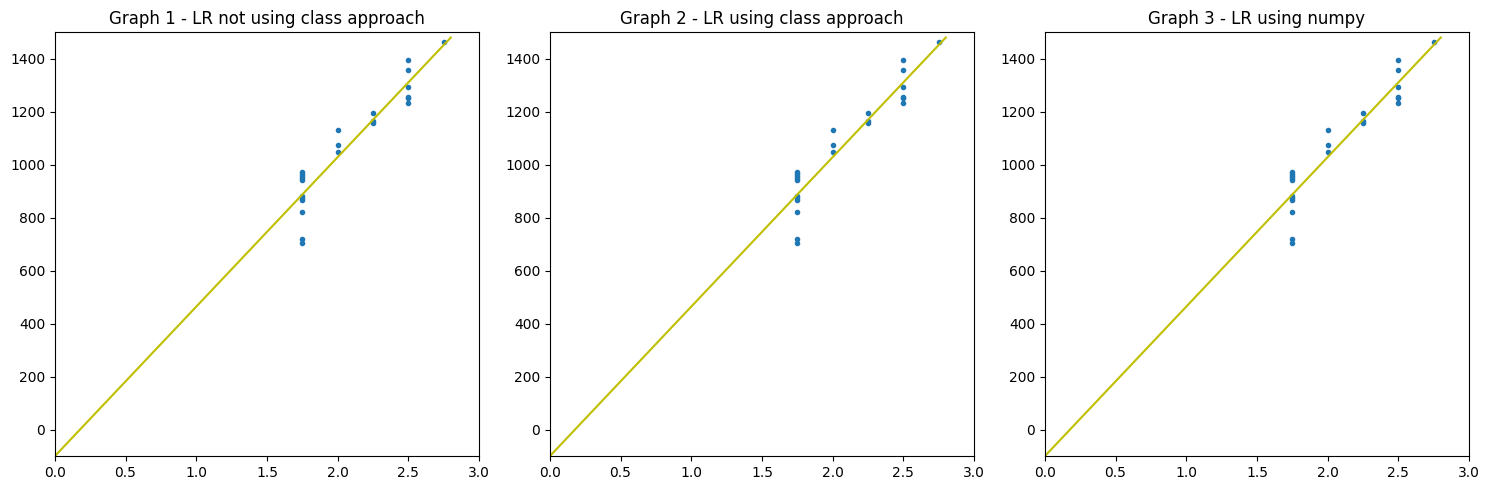

In [38]:
axis = [0, 3, -100, 1500]
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_values, y_fn, '.')
plt.plot(indices_fn, [i * weights_fn[1] + weights_fn[0] for i in indices_fn], 'y')
plt.axis(axis)
plt.title('Graph 1 - LR not using class approach')

plt.subplot(1, 3, 2)
plt.plot(x_values_cls, y_cls, '.')
plt.plot(indices_cls, [i * weights_cls[1] + weights_cls[0] for i in indices_cls], 'y')
plt.axis(axis)
plt.title('Graph 2 - LR using class approach')

plt.subplot(1, 3, 3)
plt.plot(X_np[:,1],y_np,'.')
plt.plot(ind, ind*weights_np[1]+weights_np[0],'y')
plt.axis(axis)
plt.title('Graph 3 - LR using numpy')

plt.tight_layout()
plt.show()

**Conclusion:**
    
As evident from the preceding graphs (Graph 1 through Graph 3), all three approaches, whether employing `NumPy`, functional programming, or encapsulating the logic into a class, lead to the same final outcome. Nevertheless, leveraging `NumPy` significantly expedites the process, allowing us to attain the identical result in a much more time-efficient manner.

## Reflection

**Reflecting on the Use of NumPy for Linear Regression:**

I'd like to share some key insights and thoughts on using NumPy for linear regression over the raw implementation that I have implemented above:

**Efficiency:** One of the standout advantages of using NumPy is its efficiency. NumPy's underlying C-based implementation allows for fast and optimized mathematical operations, especially when dealing with large datasets. In the context of linear regression, where matrix multiplications and calculations can be computationally intensive, NumPy shines by significantly reducing computation time. This efficiency can make a substantial difference in real-world applications, where performance matters.

**Readability:** NumPy code tends to be more concise and readable compared to manually implementing mathematical operations in raw Python. Linear regression involves matrix operations, and NumPy allows you to express these operations in a more intuitive and mathematical way. This readability not only makes your code more accessible to others but also reduces the chances of introducing errors.

There is other subtopics I would develop like Numpys ecosystem and learning curve but for the purposes of this reflection I'll keep it short. 

In conclusion, using NumPy combines efficiency, readability, flexibility, and a supportive ecosystem, making it an essential tool for tackling linear regression problems of varying complexity. While there might be a learning curve for newcomers, the long-term benefits in terms of productivity and performance make it a worthwhile investment.

**Using classes:**


Using classes for encapsulation offers several advantages over using functions when designing and structuring code. In summary:

**Organization:** Classes allo  to group related data and functions together, providing a clear and organized structure for code. This improves code readability and maintainability, especially for larger and more complex projects.

**Abstraction:** Classes enable to define abstract data types with well-defined interfaces. This abstraction hides the implementation details, making it easier to reason about and work with complex systems.

**Encapsulation:** Classes provide encapsulation, allowing to control access to data and methods. 

**Stateful Behavior:** Classes can maintain state over time, which is crucial for modeling objects that evolve or respond to external events.

Also as seen in my implementation the use of class allow for method chaning which can signficantly shorten code but on the contrary make it more difficult to read when reviewing code.

This exercies was a great refresher for dealing with matrices and also a further refresher on using Python.